In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open("CALIB_rot.txt", "r") as file:
    raw_data = file.read().strip().split("ModeConstantDC")[1:-1]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")))

data_np = np.zeros((len(columns), ndata))
for i in range(ndata):
    data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), raw_data[i].strip().split("\n")))

data = pd.DataFrame(data_np.T, columns=columns)
data.insert(0,"time",np.cumsum(data["dt"]),True)
print(str(data.columns))

IndexError: list index out of range

NameError: name 'data' is not defined

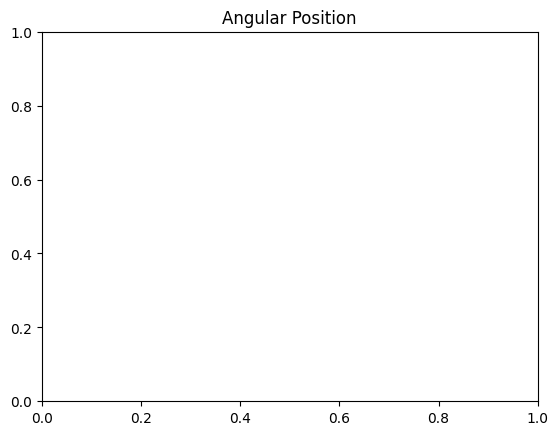

In [3]:
plt.title("Angular Position")
plt.plot(data["time"], data["thetapos"], label="x")
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.grid()
plt.show()

In [123]:
final_thetapos = data["thetapos"][ndata-1] 
print("final theta = ", final_thetapos)
error = (final_thetapos) / (2*np.pi)
print("relative error = ", error)
wheel_l = 0.08516186673853446
corrected_wheel_l = wheel_l / (1+error)
print(corrected_wheel_l)
print(2*corrected_wheel_l)
# -1.859

final theta =  0.15355838124
relative error =  0.024439575427535772
0.08313019994663261
0.16626039989326521


## After calibration data

In [124]:
with open("CALIB_rot_after_calib.txt", "r") as file:
    raw_data = file.read().strip().split("ModeConstantDC")[1:-1]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")))

data_np = np.zeros((len(columns), ndata))
for i in range(ndata):
    data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), raw_data[i].strip().split("\n")))

data_after_calib = pd.DataFrame(data_np.T, columns=columns)
data_after_calib.insert(0,"time",np.cumsum(data_after_calib["dt"]))
print(str(data_after_calib.columns))

Index(['time', 'dt', 'xpos', 'ypos', 'thetapos', 'vfwd', 'omega', 'speed_left',
       'speed_right', 'dc left', 'dc right'],
      dtype='object')


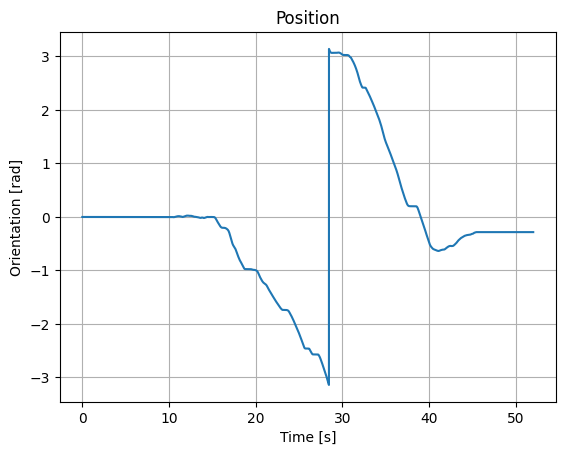

In [125]:
plt.title("Position")
# plt.plot(data_after_calib["thetapos"], label="theta")
plt.plot(data_after_calib["time"], data_after_calib["thetapos"], label="theta")
plt.xlabel("Time [s]")
plt.ylabel("Orientation [rad]")
plt.grid()
plt.show()

In [126]:
final_thetapos = data_after_calib["thetapos"][ndata-1] 
print("final theta = ", final_thetapos)
error = (final_thetapos) / (2*np.pi)
print("relative error = ", error)
wheel_l = 0.07864235507814082
corrected_wheel_l = wheel_l / (1+error)
print(corrected_wheel_l)
print(2*corrected_wheel_l)

final theta =  -0.28330968603
relative error =  -0.04509013695748739
0.08235578887788665
0.1647115777557733
